# Analysis of Distribution of Waves in One Mission

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

import mission_tools

%load_ext autoreload
%autoreload 2
%matplotlib widget

## Load a single mission dataset for analysis

In [2]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_78.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission_dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: DUNEX microSWIFT drifter - Mission 78
    summary: University of Washington - Applied Physics Lab team collected these data using microSWIFT wave buoys at the USACE Field Research Facility as part of the USCRP funded project DUNEX (During Nearshore Events Experiment). The file contains both directly measured and computed quantities from the drifting wave buoys. The collection and processing of these data is explained in the github repository at https://github.com/SASlabgroup/DUNEXMainExp along with examples of how these data can be used.
    institution: University of Washington - Applied Physics Lab
    source: Observations from microSWIFT drifters deployed in the DUring Nearshore Events eXperiment (DUNEX)
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    creator_country: USA
    creator_email: erainvil@uw.edu
    creator_name: EJ Rainville, Jim T

## Plot the Time Series of Sea Surface Elevation Along Each Track

<AxesSubplot:xlabel='Time [UTC]', ylabel='Sea Surface Elevation [m]'>

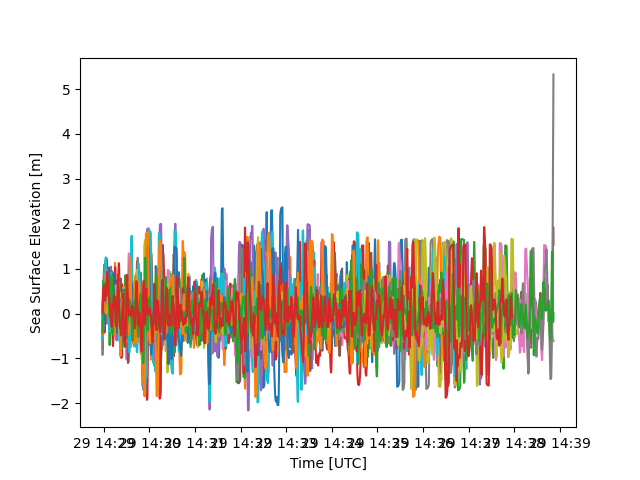

In [3]:
mission_tools.plot_mission_eta(mission_dataset)

## Plot the Drift Tracks of all microSWIFTs on the mission

<AxesSubplot:xlabel='Cross Shore Location [meters]', ylabel='Along Shore Location [meters]'>

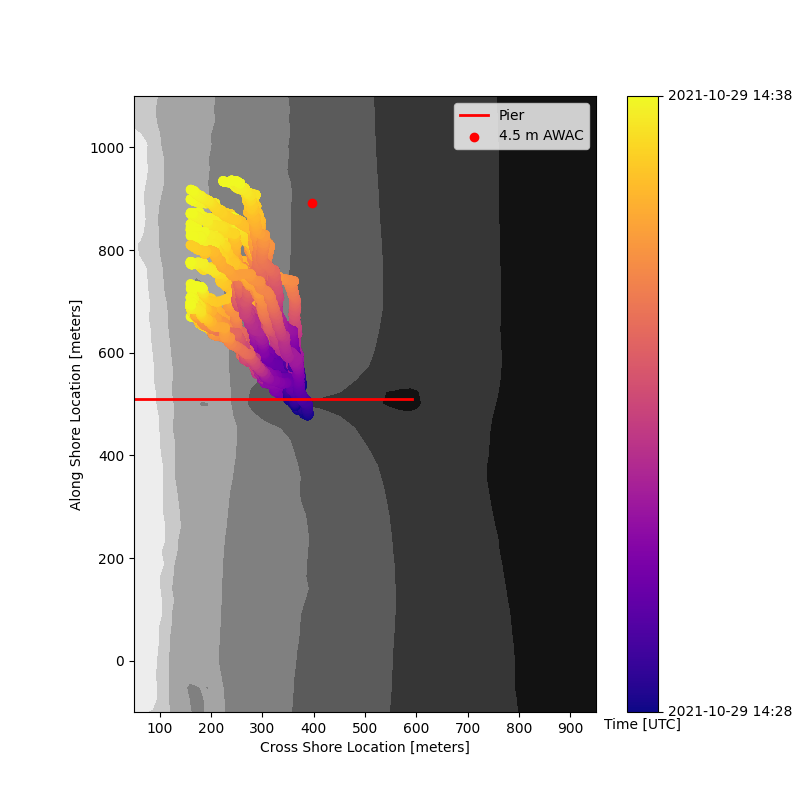

In [4]:
# bathy_file = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/' \
#              'geomorphology/DEMs/surveyDEM/data/' \
#              'FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
mission_tools.plot_mission_tracks(mission_dataset, bathy_file)

## Compute the Height and Location of each individual wave on the Mission

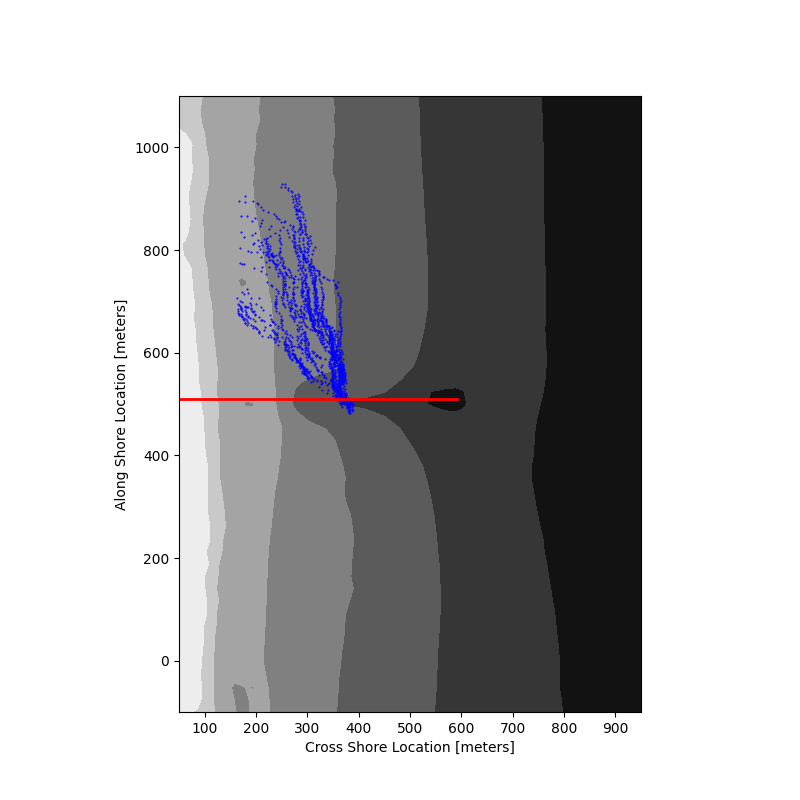

In [5]:
x_locations = mission_dataset['xFRF'][:]
y_locations = mission_dataset['yFRF'][:]
eta = mission_dataset['sea_surface_elevation'][:]
time = mission_dataset['time'][:]

wave_heights, \
wave_x_locs, \
wave_y_locs, \
wave_periods = mission_tools.compute_individual_waves(x_locations,
                                                     y_locations,
                                                     eta, time,
                                                     bathy_file)

mission_tools.plot_wave_locations(wave_x_locs, wave_y_locs, bathy_file, 'b')

## Plot the Distribution of Wave Heights on this Mission

Hs = 2.1925778331876176 meters - 4 * sqrt(var(eta))
Hs = 1.7631184704332827 meters - Average Top Third Method
Hs = 1.7231411158316765 meters - 1.416 * H_rms


/Users/ejrainville/Documents/DUNEXMainExp/.dunex-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


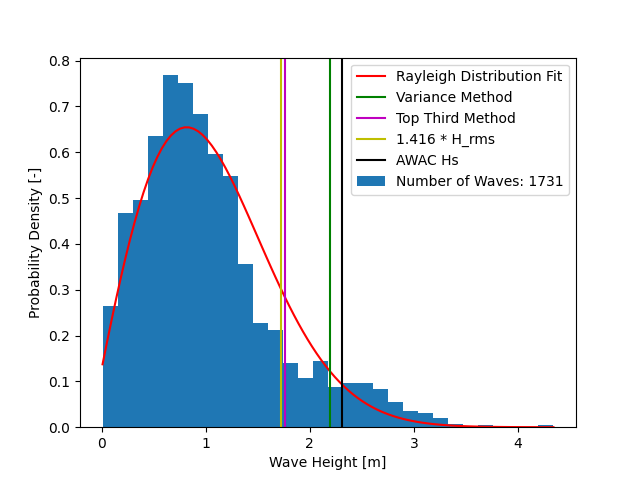

In [6]:
num_bins = 30
ax = mission_tools.plot_wave_height_dist(wave_heights, num_bins)

sig_wave_height_var = mission_tools.compute_sig_wave_height_var(eta)
print(f'Hs = {sig_wave_height_var} meters - 4 * sqrt(var(eta))')

sig_wave_height_top_third, standard_dev = mission_tools.compute_sig_wave_height_top_third(wave_heights)
print(f'Hs = {sig_wave_height_top_third} meters - Average Top Third Method')

sig_wave_height_rms = mission_tools.compute_sig_wave_height_rms(wave_heights)
print(f'Hs = {sig_wave_height_rms} meters - 1.416 * H_rms')

awac_file = '../microSWIFT_data/FRFdata/FRF-ocean_waves_awac-4.5m_202110.nc'
mission_time = np.median(mission_dataset['time'][:])
awac_sig_wave_height = mission_tools.closest_awac_sig_wave_height(mission_time, awac_file)

ax.axvline(x=sig_wave_height_var, label='Variance Method', color='g')
ax.axvline(x=sig_wave_height_top_third, label='Top Third Method', color='m')
ax.axvline(x=sig_wave_height_rms, label='1.416 * H_rms', color='y')
ax.axvline(x=awac_sig_wave_height, label='AWAC Hs', color='k')
ax.legend()

## Wave Heights from Individual microSWIFTs

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}


[49 40 41 24 23 15 12 37 64 38 62 54 10 72 16 42 45 73 60 34 33 66 57 35]
Hs = 2.217274242427069 meters - Variance Method
Hs = 1.849726528968241 meters - Average Top Third Method


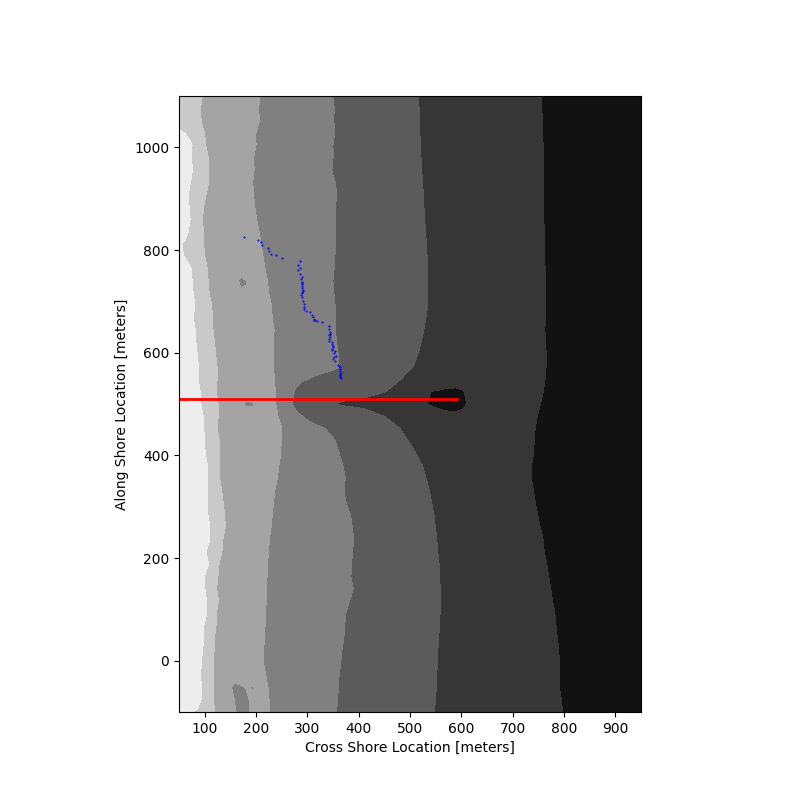

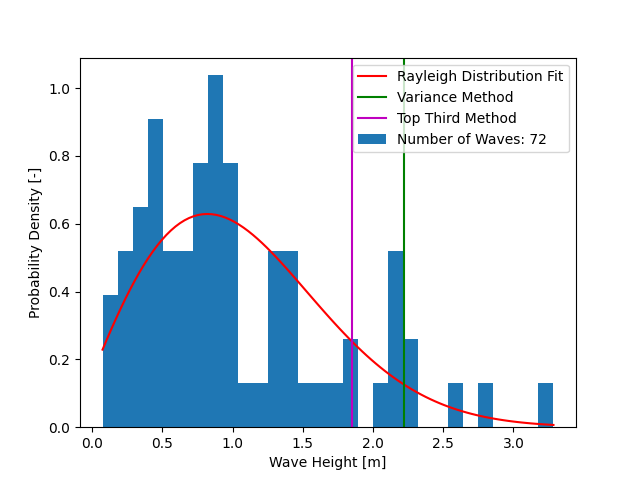

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}


In [7]:
trajectories = mission_dataset['trajectory'][:]
print(trajectories)
trajectory_ind = 0
x_locations = mission_dataset['xFRF'][trajectory_ind,:]
y_locations = mission_dataset['yFRF'][trajectory_ind,:]
eta = mission_dataset['sea_surface_elevation'][trajectory_ind,:]
time = mission_dataset['time'][:]

wave_heights, \
wave_x_locs, \
wave_y_locs, \
wave_periods = mission_tools.compute_individual_waves(x_locations,
                                                     y_locations,
                                                     eta, time,
                                                     bathy_file,
                                                     single_trajectory=True)

mission_tools.plot_wave_locations(wave_x_locs, wave_y_locs, bathy_file, 'b')

num_bins = 30
ax = mission_tools.plot_wave_height_dist(wave_heights, num_bins)

sig_wave_height_var = mission_tools.compute_sig_wave_height_var(eta, single_trajectory=True)
print(f'Hs = {sig_wave_height_var} meters - Variance Method')

sig_wave_height_top_third, standard_dev = mission_tools.compute_sig_wave_height_top_third(wave_heights)
print(f'Hs = {sig_wave_height_top_third} meters - Average Top Third Method')

ax.axvline(x=sig_wave_height_var, label='Variance Method', color='g')
ax.axvline(x=sig_wave_height_top_third, label='Top Third Method', color='m')
ax.legend()